In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

Seasonal Naive Method

In [42]:
data = pd.read_csv('./data/BTC factors/supply/BTC_10m_active_3m_6m.csv',index_col=0)
start_time = '2024-08-21 00:00:00'
data.index = pd.to_datetime(data.index)
data = data[start_time:]


series = data.iloc[:, 0].astype(float).to_numpy()

fft = np.fft.fft(series - np.mean(series))
freqs = np.fft.fftfreq(len(series))
periods = 1 / np.abs(freqs[np.argmax(np.abs(fft[1:])) + 1])
periods_int = int(round(periods, 0))

print('The seasonal period:', periods_int)

The seasonal period: 41904


We can found that there is no seasonal period in the data , therefore the seasonal naive can turn to naive model

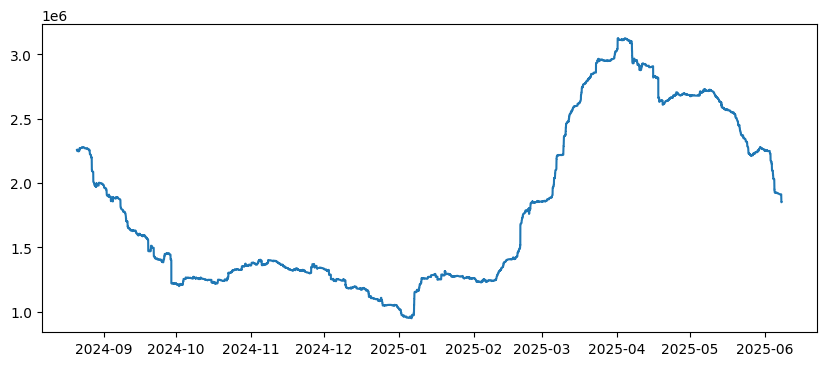

In [43]:
plt.figure(figsize=(10,4))
plt.plot(data)
plt.show()

In [44]:
def seasonal_naive(input_data,m=periods_int,h=144):
    past = input_data[-m:] 
    forecast_values =[]
    for i in range(h):
        forecast_value = past.iloc[i%m].iloc[0] 
        forecast_values.append(forecast_value)
    forecast_values = np.array(forecast_values)
    forecast_index = pd.date_range(start=input_data.index[-1] + pd.Timedelta(minutes=10),
                               periods=h, freq='10min')
    
    forcast = pd.Series(forecast_values,index=forecast_index)
    return forcast
input_data = data[:-144]
forecast_one_day = seasonal_naive(input_data)
print(forecast_one_day)

2025-06-07 00:00:00    2.256013e+06
2025-06-07 00:10:00    2.255930e+06
2025-06-07 00:20:00    2.256090e+06
2025-06-07 00:30:00    2.256175e+06
2025-06-07 00:40:00    2.256151e+06
                           ...     
2025-06-07 23:10:00    2.253074e+06
2025-06-07 23:20:00    2.253009e+06
2025-06-07 23:30:00    2.254251e+06
2025-06-07 23:40:00    2.254271e+06
2025-06-07 23:50:00    2.254271e+06
Freq: 10min, Length: 144, dtype: float64


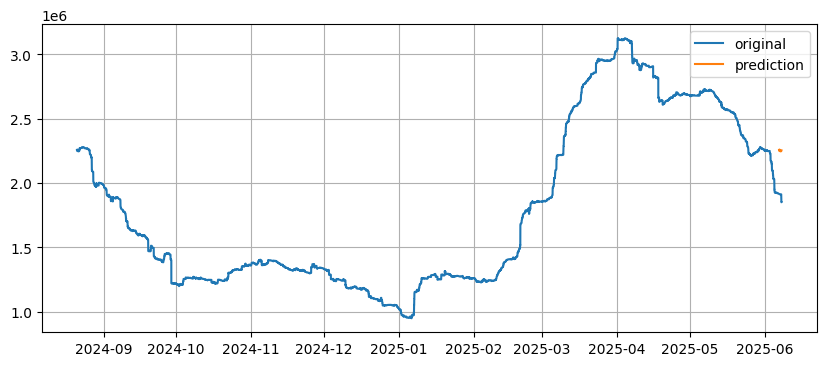

In [46]:
prediction_data = data[-144:]
plt.figure(figsize=(10,4))
plt.plot(data,label='original')
plt.plot(forecast_one_day,label='prediction')
plt.legend()
plt.grid()
plt.show()

In [47]:
prediction_data_value = prediction_data['active_3m_6m']
MSE = np.mean((forecast_one_day-prediction_data_value)**2)
MAE = np.mean(abs(forecast_one_day-prediction_data_value))
print('MSE:',MSE)
print('MAE:',MAE)

MSE: 117913520511.82649
MAE: 342971.17427285365


Drift Method

In [24]:
def drift(input,h):
    slope = (input.iloc[:,0][-1] - input.iloc[:,0][0]) /len(input)
    preds = []
    for i in range(1,h+1):
        pred = input.iloc[:,0][-1] + i*slope
        preds.append(pred)
    preds = np.array(preds)
    pred_index = pd.date_range(start=input.index[-1] + pd.Timedelta(minutes=10),
                               periods=h, freq='10min')
    forecast = pd.Series(preds,index=pred_index)
    return forecast

forecast_one_day_drift = drift(data[:-144],h=144)
print(forecast_one_day_drift)

   

2025-06-07 00:00:00    1.915826e+06
2025-06-07 00:10:00    1.915817e+06
2025-06-07 00:20:00    1.915809e+06
2025-06-07 00:30:00    1.915801e+06
2025-06-07 00:40:00    1.915793e+06
                           ...     
2025-06-07 23:10:00    1.914693e+06
2025-06-07 23:20:00    1.914685e+06
2025-06-07 23:30:00    1.914677e+06
2025-06-07 23:40:00    1.914669e+06
2025-06-07 23:50:00    1.914661e+06
Freq: 10min, Length: 144, dtype: float64


C:\Users\caiyx\AppData\Local\Temp\ipykernel_31908\4143196222.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = (input.iloc[:,0][-1] - input.iloc[:,0][0]) /len(input)
C:\Users\caiyx\AppData\Local\Temp\ipykernel_31908\4143196222.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = input.iloc[:,0][-1] + i*slope


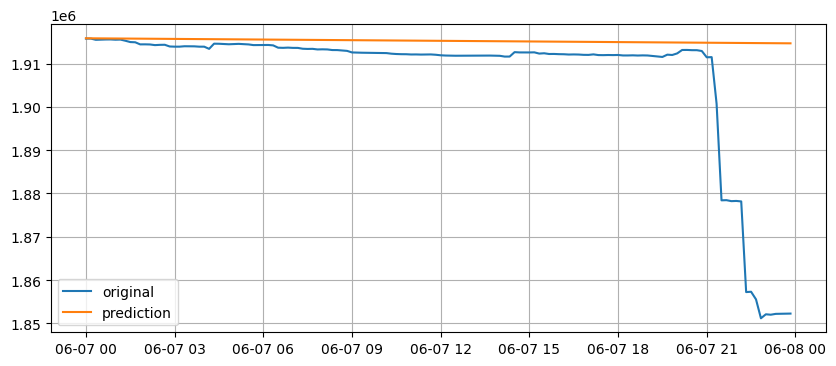

In [25]:
plt.figure(figsize=(10,4))
plt.plot(prediction_data,label='original')
plt.plot(forecast_one_day_drift,label='prediction')
plt.legend()
plt.grid()
plt.show()

In [14]:
prediction_data_value = prediction_data['active_3m_6m']
MSE_drift = np.mean((forecast_one_day_drift-prediction_data_value)**2)
MAE_drift = np.mean(abs(forecast_one_day_drift-prediction_data_value))
print('MSE:',MSE_drift)
print('MAE:',MAE_drift)

MSE: 313939152.0814532
MAE: 7663.029566528864
